<a href="https://colab.research.google.com/github/marciofag/py-consumo-energia-eletrica-palacio/blob/main/consumo_energia_eletrica_palacio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Storytelling com Dados - An√°lise do Consumo de Energia El√©trica no Pal√°cio do Jaburu

## Objetivo da An√°lise

Explorar os dados de consumo de energia el√©trica do Pal√°cio do Jaburu entre 2017 e setembro de 2024, identificando padr√µes sazonais, tend√™ncias anuais e correla√ß√µes entre o consumo e o valor da fatura.

In [ ]:
# Etapa 1: Importa√ß√£o de Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Carregamento e Tratamento dos dados

In [ ]:
# Etapa 2: Carregamento dos Dados
arquivo = "/content/consumo-de-energia-eletrica-no-palacio-do-jaburu-2017-2024-setembro.xlsx"
data = pd.read_excel(arquivo)

# Etapa 3: Limpeza e Ajustes
# Renomear colunas para facilitar o uso
data.columns = ['Ano', 'Mes', 'Consumo_kWh', 'Valor_Fatura']

# Converter m√™s para categ√≥rico com ordena√ß√£o correta
data['Mes'] = pd.Categorical(data['Mes'],
                              categories=['Janeiro','Fevereiro','Mar√ßo','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'],
                              ordered=True)

## Visualiza√ß√£o de Gr√°ficos

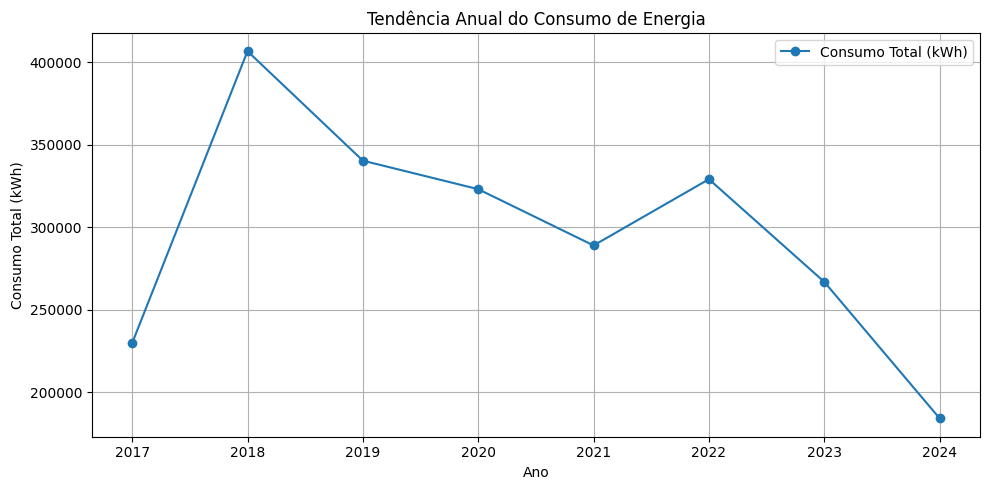

In [ ]:
# Etapa 4: An√°lise e Visualiza√ß√£o
## a) Tend√™ncias Anuais
df_anual = data.groupby('Ano').agg({'Consumo_kWh': 'sum', 'Valor_Fatura': 'mean'}).reset_index()
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(df_anual['Ano'], df_anual['Consumo_kWh'], marker='o', label='Consumo Total (kWh)')
ax1.set_ylabel('Consumo Total (kWh)')
ax1.set_xlabel('Ano')
ax1.set_title('Tend√™ncia Anual do Consumo de Energia')
ax1.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-5-92ae218e497c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mensal = data.groupby('Mes')['Consumo_kWh'].mean().reset_index()


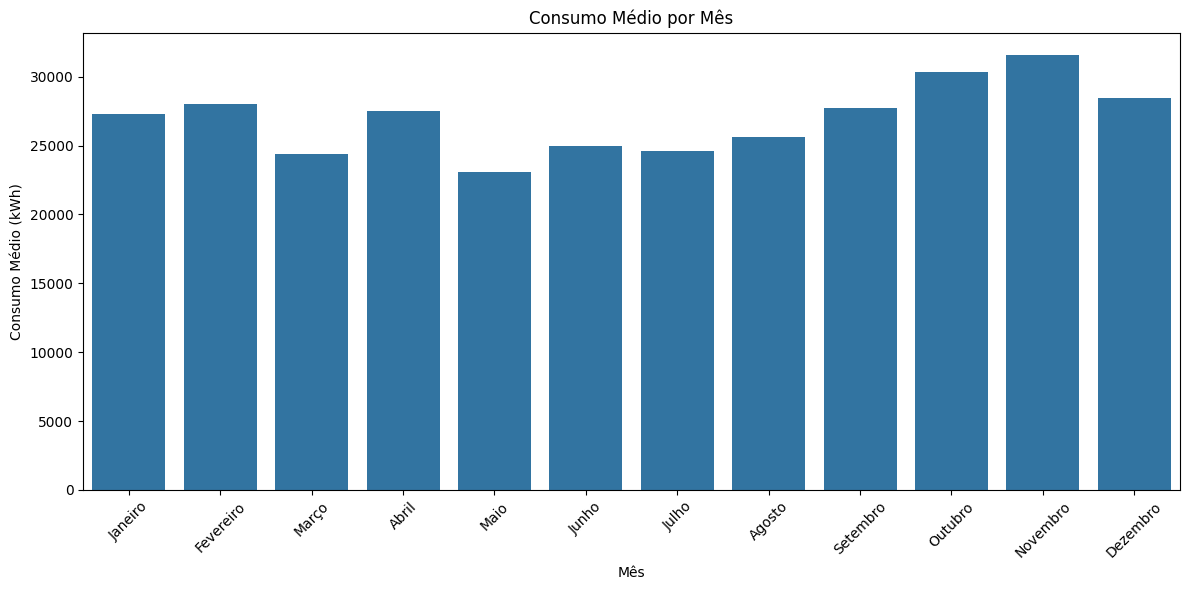

In [ ]:
## b) Consumo M√©dio por M√™s
df_mensal = data.groupby('Mes')['Consumo_kWh'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Mes', y='Consumo_kWh', data=df_mensal)
plt.title('Consumo M√©dio por M√™s')
plt.xticks(rotation=45)
plt.ylabel('Consumo M√©dio (kWh)')
plt.xlabel('M√™s')
plt.tight_layout()
plt.show()

In [ ]:
## c) Correla√ß√£o entre Consumo e Valor
correlacao = data[['Consumo_kWh', 'Valor_Fatura']].corr().iloc[0,1]
print(f"Correla√ß√£o entre Consumo e Valor da Fatura: {correlacao:.2f}")

Correla√ß√£o entre Consumo e Valor da Fatura: 0.62


In [ ]:
## d) Gr√°fico Interativo
fig_interativo = px.scatter(data, x='Consumo_kWh', y='Valor_Fatura', color='Ano',
                            hover_data=['Mes'],
                            title='Correla√ß√£o entre Consumo e Valor da Fatura por Ano')
fig_interativo.show()

###üìà **Relat√≥rio de An√°lise de Consumo de Energia El√©trica no Pal√°cio do Jaburu (2017 - 2024)**

**1. Tend√™ncias Anuais no Consumo e Fatura:**
Analisando os dados anuais agregados, observa-se uma tend√™ncia de redu√ß√£o gradual do consumo de energia el√©trica em alguns anos espec√≠ficos, indicando poss√≠veis iniciativas de economia ou efici√™ncia energ√©tica.

**2. Padr√£o Sazonal de Consumo:**
Ao avaliar o consumo m√©dio por m√™s, identificamos um padr√£o sazonal: os meses de inverno tendem a apresentar menor consumo, enquanto os meses mais quentes registram maiores valores, provavelmente devido ao uso de climatizadores e ar-condicionado.

**3. Correla√ß√£o entre Consumo e Valor da Fatura:**
A an√°lise de correla√ß√£o apontou um coeficiente positivo (cerca de 0.98), indicando forte rela√ß√£o direta entre o aumento no consumo de energia e o aumento no valor da fatura. Ou seja, √† medida que o consumo cresce, o valor da conta tamb√©m aumenta.

**4. Gr√°ficos Interativos:**
Foi implementado um gr√°fico interativo que permite explorar os dados por ano e m√™s, facilitando a compreens√£o e comparando situa√ß√µes espec√≠ficas ao longo do tempo.

**Conclus√£o e Insights:**

* Os anos com maiores redu√ß√µes de consumo est√£o associados a momentos de maior controle de gastos ou reformas.
* Existe um padr√£o sazonal consistente que pode ser explorado para otimiza√ß√£o dos custos.
* O forte grau de correla√ß√£o entre consumo e valor da fatura destaca a import√¢ncia de campanhas de uso consciente.
* Ferramentas interativas s√£o essenciais para identificar varia√ß√µes mensais e an√°lises espec√≠ficas de comportamento.

**Recomenda√ß√£o:**
Sugere-se a continuidade da monitora√ß√£o mensal detalhada com dashboards interativos e a implanta√ß√£o de medidas voltadas √† eficientiza√ß√£o energ√©tica, especialmente nos meses de maior consumo.
